### FinanceDataReader ?
* 한국 주식 가격, 미국 주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

In [4]:
# 설치
#!pip install -U finance-datareader

In [13]:
import pandas as pd

In [14]:
#FinanceeDataReader as pdr
import FinanceDataReader as fdr

fdr.__version__

'0.9.20'

In [15]:
#!pip install beautifulsoup4

### 한국거래소 상장 종목 전체 가져오기

In [16]:
#도움말을 볼때는 ? 를 사용하고 소스코드를 볼때는 ??
#주피터 노트북에서는 함수나 메소드의 괄호 안에서 shift+ tab 키를 누르면 도움말을 볼 수 있음
fdr.StockListing??

In [17]:
#KRX 
#KOSPI
#KOSDAQ 
#KONEX 
#NASDAQ
#NYSE
#SP500

df_krx = fdr.StockListing("KRX")
df_krx.shape

(6538, 10)

In [18]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6538 entries, 0 to 6537
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          6538 non-null   object        
 1   Market          6538 non-null   object        
 2   Name            6538 non-null   object        
 3   Sector          2421 non-null   object        
 4   Industry        2402 non-null   object        
 5   ListingDate     2421 non-null   datetime64[ns]
 6   SettleMonth     2421 non-null   object        
 7   Representative  2421 non-null   object        
 8   HomePage        2245 non-null   object        
 9   Region          2421 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 561.9+ KB


In [19]:
#object 타입은 문자열
#기술통계 값을 요약

df_krx.describe()

/Users/jin/opt/anaconda3/envs/jin_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,6538,6538,6538,2421,2402,2421,2421,2421,2245,2421
unique,6538,3,6538,158,2250,1784,9,2307,2224,22
top,100660,KOSPI,TIGER 중국소비테마,특수 목적용 기계 제조업,기업인수합병,1996-07-03 00:00:00,12월,-,http://www.ildong.com,서울특별시
freq,1,4893,1,142,37,8,2360,5,2,977
first,NaN,NaN,NaN,NaN,NaN,1956-03-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-02-10 00:00:00,NaN,NaN,NaN,NaN


### 파일로 저장하고 불러오기

In [20]:
#to_csv 로 Dataframe을 데이터 저장 파일 csv 파일로 바꿈
df_krx.to_csv("krx.csv", index=False)

In [21]:
#csv로 저장된 파일 df로 읽어서 확인
pd.read_csv("krx.csv")

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
6533,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6534,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6535,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6536,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [22]:
df = pd.read_csv("krx.csv")
df.shape

(6538, 10)

### 상장종목 목록 사용하기
* 종목명과 심볼을 찾기 위해 상장 종목 목록 사용

In [23]:
df_krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
6533,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6534,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6535,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6536,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [24]:
df_krx[["Symbol", "Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [25]:
df_krx["Name"]

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
6533    흥국화재2우B
6534      흥국화재우
6535       흥아해운
6536         희림
6537         힘스
Name: Name, Length: 6538, dtype: object

In [26]:
item_name = "빅히트"
df_krx.loc[df_krx["Name"] == item_name,"Symbol"]
df_krx.loc[df_krx["Name"] == item_name,"Symbol"].tolist()[0]

'352820'

In [27]:
df_krx.loc[df_krx["Name"] == item_name,"Symbol"].tolist()[0]

'352820'

### 종목명으로 종목 코드 받아오는 함수 만들기

In [28]:
# 종목명으로 종목 코드 ㅂ다아오는 함수 만들기
# df_krx의 Name column 에서 같은 값이 있으면 Row의 Symbol 컬럼 값을 List 로 name_list에
def item_code_by_item_name(item_name):
    """
    종목명을 받아서 종목 코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        return item_code_list

In [29]:
item_code_by_item_name("카카오게임즈")

['293490']

In [30]:
fdr.DataReader(item_code_by_item_name("삼성전자"))

AttributeError: 'list' object has no attribute 'isdigit'

In [31]:
df = df_krx
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
6533,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6534,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6535,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6536,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [32]:
#하나의 행만 가져오기
df["Name"]

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
6533    흥국화재2우B
6534      흥국화재우
6535       흥아해운
6536         희림
6537         힘스
Name: Name, Length: 6538, dtype: object

### 데이터 색인하기
 #### Series

In [33]:
type(df["Name"])

pandas.core.series.Series

In [34]:
#특정 값만 가져오기
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                   특수 목적용 기계 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate        2002-04-23 00:00:00
SettleMonth                        03월
Representative      박종익, 김세완 (각자 대표이사)
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [35]:
type(df.loc[0])

pandas.core.series.Series

In [36]:
#df 변수 타입 - DataFrame
type(df)

pandas.core.frame.DataFrame

In [37]:
# 여러 컬럼을 지정할때는 리스트 형태로 묶어야 함
# 2차원 행렬은 대괄호가 [] 2개
df[["Name","Symbol"]].head()

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520


In [38]:
#여러개의 행을 가지고 올때도 [] 대괄호 2개 리스트 형태로 묶어줌
df.loc[[0,3,5,7]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN


#### DataFrame

In [39]:
#1개의 컬럼을 가져올 때 대괄호 2개 써서 리스트 형태로 묶어주면 데이터 프레임 형태
df[["Name"]]
type(df[["Name"]])

pandas.core.frame.DataFrame

In [40]:
type(df["Name"])

pandas.core.series.Series

#### loc를 통한 서브셋 가져오기

In [41]:
#행과 열 가져오기
#.loc[행, 열]
df["Name"][0] #데이터 프레임을 2번 접근하게 되서 비효율적
df.loc[0,"Name"]

'3S'

In [42]:
#여러개의 행과 하나의 컬럼 가져오기
df.loc[[0,1,2],"Name"]

0        3S
1    AJ네트웍스
2     AK홀딩스
Name: Name, dtype: object

In [43]:
#여러개의 행과 여러개의 컬럼
df.loc[[0,1,2,3],["Name","Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620


#### Boolean Indexing
* 결과값이 True, False 형태로 반환됨
* Boolean Indexing 을 통해 특정 조건식을 만족하는 데이터를 가져옴


In [44]:
#카카오 찾기
df[df["Name"] == "카카오"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
4534,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"여민수, 조수용",http://www.kakaocorp.com,제주특별자치도


In [45]:
#서울특별시에 소재지를 두고 있는 KOSPI 종목을 종목명과 심볼을 가져오기
#.loc[행,열]
#.loc[조건식, 열]
df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"),["Name","Symbol"]]

,Name,Symbol
1,AJ네트웍스,095570
2,AK홀딩스,006840
47,BGF,027410
48,BGF리테일,282330
50,BYC,001460
...,...,...
6521,휴비스,079980
6523,휴스틸,005010
6527,휴켐스,069260
6532,흥국화재,000540


### 파생변수 만들기

In [46]:
#PD.TO_DATETIME 을 통해서 데이터 타입을 변환
df["ListingDate"] = pd.to_datetime(df["ListingDate"])

In [47]:
# ListingYear 파생변수 만들기
df["ListingYear"] = df["ListingDate"].dt.year

In [48]:
type(np.nan)

float

In [49]:
# df[["ListingDate","ListingYear"]].describe()
df[["ListingDate","ListingYear"]].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

### 데이터 시각화를 위한 폰트설정

#### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

#### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

#### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [59]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "NanumGothicOTF"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [60]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'NanumGothicOTF'

<AxesSubplot:title={'center':'한글폰트'}>

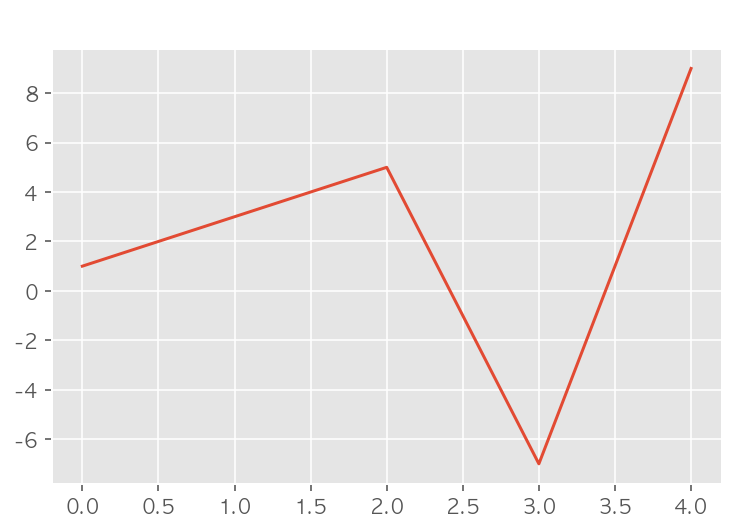

In [61]:
# 한글폰트 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

In [57]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")